Plots various comparisons between different countries

In [1]:
%%html
<style>
    .jp-OutputArea-child {
        display: inline-block;
    }
</style>

In [2]:
#Imports module and loads data
import sys
import matplotlib
import matplotlib.pyplot as plt
import datetime
import pandas as pd

#If module is not found, downloads it to root folder (ignored by git)
try: 
    import covid19_inference as cov19
except ModuleNotFoundError:
    
    sys.path.append('../covid19_inference-master')
    try:
        import covid19_inference as cov19
        
    except ModuleNotFoundError:
        url_repo = "https://github.com/Priesemann-Group/covid19_inference/archive/master.zip"

        import requests, zipfile, io
        r = requests.get(url_repo)
        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall(path="..")
        import covid19_inference as cov19
        
JHU = cov19.data_retrieval.JHU(True)
ECDC = cov19.data_retrieval.OWD(True)

INFO     [covid19_inference.data_retrieval._JHU] Successfully loaded data from local
INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded data from local


## JHU data

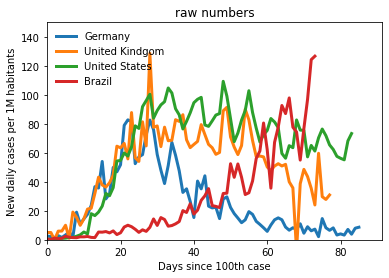

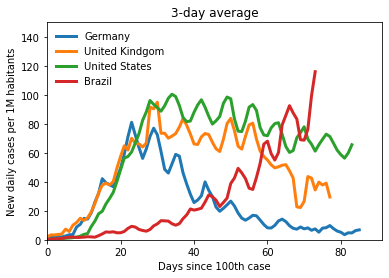

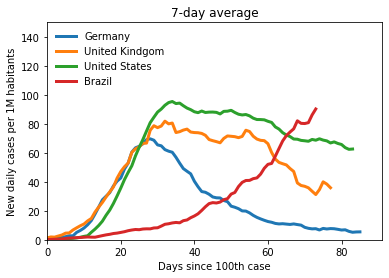

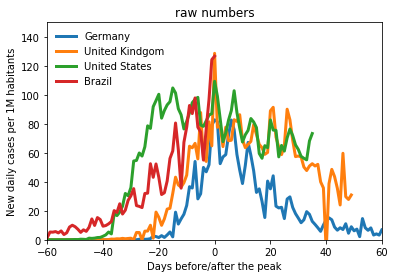

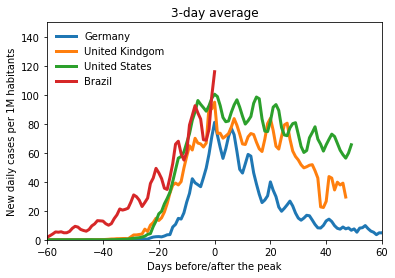

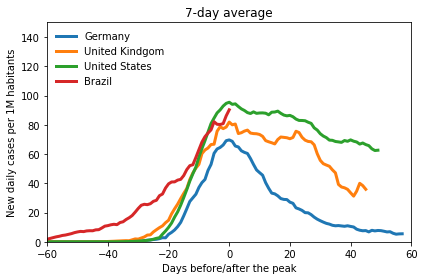

In [3]:
#Population data from https://www.worldometers.info/world-population/population-by-country/
countries = {'Germany': {'name':'Germany', 'Population': 83783942},
             'United Kingdom': {'name':'United Kindgom', 'Population': 67886011},
             #'Spain': {'name':'Spain', 'Population': 46754778},
             'US': {'name':'United States', 'Population': 331002651},
             'Brazil': {'name':'Brazil', 'Population': 212559417}
             }

#Alligned to 100th case
_, ax1 = plt.subplots() #raw
_, ax2 = plt.subplots() #rolling 3 days
_, ax3 = plt.subplots() #rolling 7 days

#Alligned to peak
_, ax1_2 = plt.subplots() #raw
_, ax2_2 = plt.subplots() #rolling 3 days
_, ax3_2 = plt.subplots() #rolling 7 days


for country in countries.keys():
    
    #Country data
    data = JHU.get_new('confirmed', country, data_begin=datetime.datetime(2020,1,24))
    data = data.reset_index()
    
    #Fills new cases
    data['confirmed_norm'] = 1e6*data['confirmed']/countries[country]['Population']
    data['confirmed_norm_rolling3'] = data['confirmed_norm'].rolling(3).mean()
    data['confirmed_norm_rolling7'] = data['confirmed_norm'].rolling(7).mean()
    
    #Days since 100th case
    date_100 = data[data['confirmed']>100]['date'].min()
    data['days_100'] = data['date'].apply(lambda x: (x - date_100).days)
    
    #Days since/before the peak
    date_max = data['date'][data['confirmed'].idxmax()]
    date_max_rolling3 = data['date'][data['confirmed_norm_rolling3'].idxmax()]
    date_max_rolling7 = data['date'][data['confirmed_norm_rolling7'].idxmax()]
    
    data['days_max'] = data['date'].apply(lambda x: (x - date_max).days)
    data['days_max_rolling3'] = data['date'].apply(lambda x: (x - date_max_rolling3).days)
    data['days_max_rolling7'] = data['date'].apply(lambda x: (x - date_max_rolling7).days)
    
    ax1.plot(data['days_100'], data['confirmed_norm'], label=countries[country]['name'], lw=3)
    ax2.plot(data['days_100'], data['confirmed_norm_rolling3'], label=countries[country]['name'], lw=3)
    ax3.plot(data['days_100'], data['confirmed_norm_rolling7'], label=countries[country]['name'], lw=3)
    
    ax1_2.plot(data['days_max'], data['confirmed_norm'], label=countries[country]['name'], lw=3)
    ax2_2.plot(data['days_max_rolling3'], data['confirmed_norm_rolling3'], label=countries[country]['name'], lw=3)
    ax3_2.plot(data['days_max_rolling7'], data['confirmed_norm_rolling7'], label=countries[country]['name'], lw=3)   
    
    ax1.set_title('raw numbers')
    ax2.set_title('3-day average')
    ax3.set_title('7-day average')

    ax1_2.set_title('raw numbers')
    ax2_2.set_title('3-day average')
    ax3_2.set_title('7-day average')
    
    for ax in [ax1, ax2, ax3]:
        ax.legend(frameon=False, loc='upper left')
        ax.set_xlim(left=0)
        ax.set_ylim([0,150])
        ax.set_xlabel('Days since 100th case')
        ax.set_ylabel('New daily cases per 1M habitants')
        plt.tight_layout()
        
    for ax in [ax1_2, ax2_2, ax3_2]: 
        ax.legend(frameon=False, loc='upper left')
        ax.set_ylim([0,150])
        ax.set_xlim([-60,60])
        ax.set_xlabel('Days before/after the peak')
        ax.set_ylabel('New daily cases per 1M habitants')        

## ECDC data

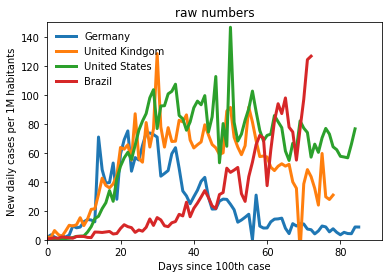

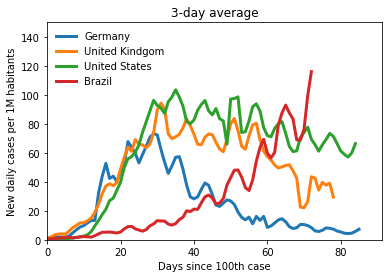

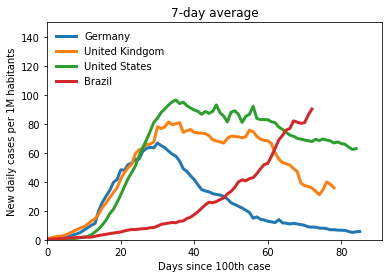

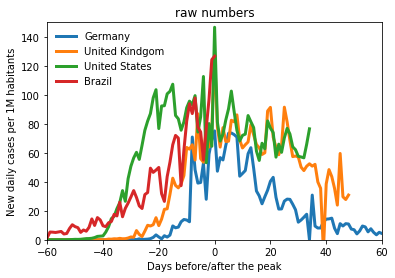

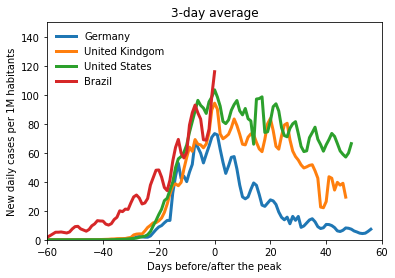

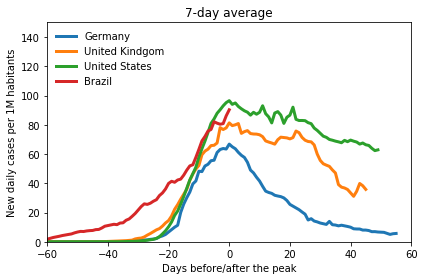

In [4]:
#Population data from https://www.worldometers.info/world-population/population-by-country/
countries = {'Germany': {'name':'Germany', 'Population': 83783942},
             'United Kingdom': {'name':'United Kindgom', 'Population': 67886011},
             #'Spain': {'name':'Spain', 'Population': 46754778},
             'United States': {'name':'United States', 'Population': 331002651},
             'Brazil': {'name':'Brazil', 'Population': 212559417}
             }

#Alligned to 100th case
_, ax1 = plt.subplots() #raw
_, ax2 = plt.subplots() #rolling 3 days
_, ax3 = plt.subplots() #rolling 7 days

#Alligned to peak
_, ax1_2 = plt.subplots() #raw
_, ax2_2 = plt.subplots() #rolling 3 days
_, ax3_2 = plt.subplots() #rolling 7 days


for country in countries.keys():
    
    #Country data
    data = ECDC.get_new('confirmed', country, data_begin=datetime.datetime(2020,1,24))
    data = data.reset_index()
    data = data.rename(columns={"new_cases":'confirmed'})
    
    #Fills new cases
    data['confirmed_norm'] = 1e6*data['confirmed']/countries[country]['Population']
    data['confirmed_norm_rolling3'] = data['confirmed_norm'].rolling(3).mean()
    data['confirmed_norm_rolling7'] = data['confirmed_norm'].rolling(7).mean()
    
    #Days since 100th case
    date_100 = data[data['confirmed']>100]['date'].min()
    data['days_100'] = data['date'].apply(lambda x: (x - date_100).days)
    
    #Days since/before the peak
    date_max = data['date'][data['confirmed'].idxmax()]
    date_max_rolling3 = data['date'][data['confirmed_norm_rolling3'].idxmax()]
    date_max_rolling7 = data['date'][data['confirmed_norm_rolling7'].idxmax()]
    
    data['days_max'] = data['date'].apply(lambda x: (x - date_max).days)
    data['days_max_rolling3'] = data['date'].apply(lambda x: (x - date_max_rolling3).days)
    data['days_max_rolling7'] = data['date'].apply(lambda x: (x - date_max_rolling7).days)
    
    ax1.plot(data['days_100'], data['confirmed_norm'], label=countries[country]['name'], lw=3)
    ax2.plot(data['days_100'], data['confirmed_norm_rolling3'], label=countries[country]['name'], lw=3)
    ax3.plot(data['days_100'], data['confirmed_norm_rolling7'], label=countries[country]['name'], lw=3)
    
    ax1_2.plot(data['days_max'], data['confirmed_norm'], label=countries[country]['name'], lw=3)
    ax2_2.plot(data['days_max_rolling3'], data['confirmed_norm_rolling3'], label=countries[country]['name'], lw=3)
    ax3_2.plot(data['days_max_rolling7'], data['confirmed_norm_rolling7'], label=countries[country]['name'], lw=3)   
    
    ax1.set_title('raw numbers')
    ax2.set_title('3-day average')
    ax3.set_title('7-day average')

    ax1_2.set_title('raw numbers')
    ax2_2.set_title('3-day average')
    ax3_2.set_title('7-day average')
    
    for ax in [ax1, ax2, ax3]:
        ax.legend(frameon=False, loc='upper left')
        ax.set_xlim(left=0)
        ax.set_ylim([0,150])
        ax.set_xlabel('Days since 100th case')
        ax.set_ylabel('New daily cases per 1M habitants')
        plt.tight_layout()
        
    for ax in [ax1_2, ax2_2, ax3_2]: 
        ax.legend(frameon=False, loc='upper left')
        ax.set_ylim([0,150])
        ax.set_xlim([-60,60])
        ax.set_xlabel('Days before/after the peak')
        ax.set_ylabel('New daily cases per 1M habitants')        